In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import metrics

In [58]:
row = pd.read_csv('hour.csv')
row

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### 重整資料

In [59]:
#排除不會用到的欄位
data = row
del row['instant'] 
del row['yr'] 
del row['dteday']
del row['cnt'] 
data


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
5,1,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1
6,1,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0
7,1,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2
8,1,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7
9,1,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6


### 評估資料

In [60]:
print(data.info()) #結果顯示沒有空值
print(data.describe())
print(data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
dtypes: float64(4), int64(9)
memory usage: 1.7 MB
None
             season          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      6.537775     11.546752      0.028770      3.003683   
std        1.106918      3.438776      6.914405      0.167165      2.005771   
min        1.000000      1.000000      0.000000      0.00

### 排除離群值

In [61]:
data2 = data[abs(data["registered"] - np.mean(data["registered"]) < 3*np.std(data["registered"]))] 
print(data2.shape)

(17008, 13)


### 評估關係係數

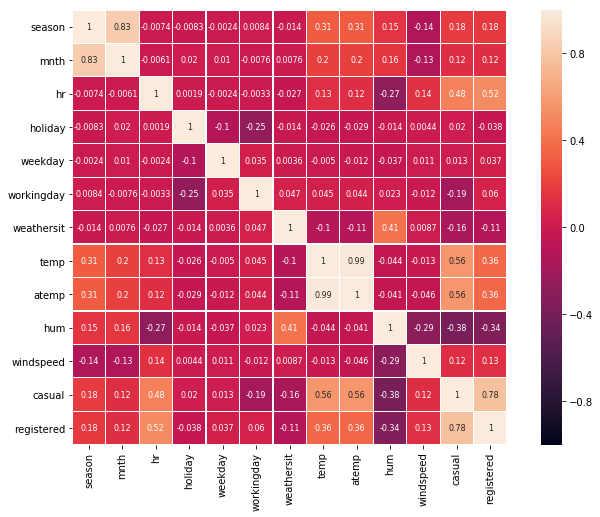

In [62]:
correlation = data2.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',
            annot=True,annot_kws={'size':8},square=True)

### 由圖可知, temp與atemp關係係數高達0.99, 保留一個即可，刪除atemp

In [63]:
del data2['atemp']
data2

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,1,1,0,0,6,0,1,0.24,0.81,0.0000,3,13
1,1,1,1,0,6,0,1,0.22,0.80,0.0000,8,32
2,1,1,2,0,6,0,1,0.22,0.80,0.0000,5,27
3,1,1,3,0,6,0,1,0.24,0.75,0.0000,3,10
4,1,1,4,0,6,0,1,0.24,0.75,0.0000,0,1
5,1,1,5,0,6,0,2,0.24,0.75,0.0896,0,1
6,1,1,6,0,6,0,1,0.22,0.80,0.0000,2,0
7,1,1,7,0,6,0,1,0.20,0.86,0.0000,1,2
8,1,1,8,0,6,0,1,0.24,0.75,0.0000,1,7
9,1,1,9,0,6,0,1,0.32,0.76,0.0000,8,6


### 第一類天氣的註冊用戶租用較多，第四類較少

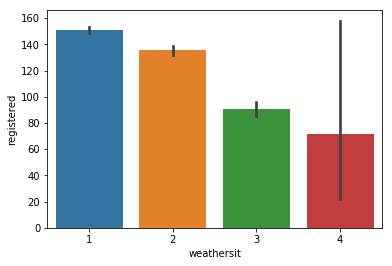

In [79]:
sns.barplot(x="weathersit", y="registered", data=data2)

### 平日註冊用戶租用較多，假日較少

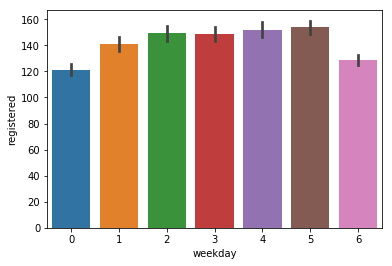

In [81]:
sns.barplot(x="weekday", y="registered", data=data2)

### 7-9，16-19註冊用戶租用較多，其他時段較少

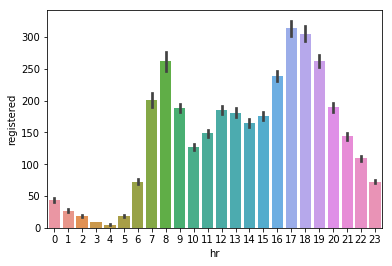

In [85]:
sns.barplot(x="hr", y="registered", data=data2)

### 春天註冊用戶租用較少，其餘較平均

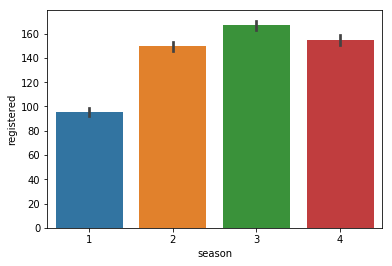

In [84]:
sns.barplot(x="season", y="registered", data=data2)

### 建立模型Training

In [65]:
x = data2.iloc[:,:11]
y = data2.iloc[:,11]
#x
#y
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=555)
train = X_train.join(y_train)
test = X_test.join(y_test)

In [66]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(X_train,y_train)
score = model.score(X_train,np.array(y_train))
print('traning_score=', score)

traning_score= 0.3493650047036689


In [76]:
predict_y_train = model.predict(X_train)
accuracy = metrics.accuracy_score(predict_y_train, np.array(y_train))
precision = metrics.precision_score(predict_y_train, np.array(y_train), average='weighted')
recall = metrics.recall_score(predict_y_train, np.array(y_train), average='weighted')
print('traning_accuracy_score =', accuracy )
print('traning_precision_score =', precision )
print('traning_recall_score =', recall )

traning_accuracy_score = 0.3493650047036689
traning_precision_score = 0.4807055995347171
traning_recall_score = 0.3493650047036689


C:\Users\0262\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
